## SVM for hand-written digit recognition

As an example of support vector machines in action, let's take a look at the hand-written digit recognition problem. We will use the MNIST dataset, which consists of several thousand gray scale images of hand-written digits. You can load directly the dataset with sklearn.

In this exercise you should:

 - Visualize and present the dataset
 - Apply the SVC to perform multi-class classification
 - Comment on the usage of the different kernels and the effect of the hyper-parameters
 - Visualize the results with a confusion matrix
 - Create a grid with different test examples showing the predicted and the true label
 - Compute the accuracy score and comment on the results
 - Perform any other experiments that you can think of, always reason about the results!

In [1]:
from sklearn.datasets import load_digits
mnist = load_digits(n_class=10)

In [2]:
import pandas as pd
import numpy as np
import sklearn

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

### After downloading the dataset, print the general description of the dataset. Then print the target names and the shape of the images.

In [4]:
print(mnist.DESCR)
print('___________________________________________________________________________________________________')
print()
print('Target Names:',mnist.target_names)
print()
print('Shape:', mnist.images.shape)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each bloc

### Now print again the shape of `mnist.images` and `mnist.data`. 

In [5]:
print('Shape Images:', mnist.images.shape)
print('Shape Data:', mnist.data.shape)

Shape Images: (1797, 8, 8)
Shape Data: (1797, 64)


In [6]:
mnist.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [7]:
shape_images = pd.Series(map(lambda x:[x], mnist.images)).apply(lambda x:x[0]).head(3)
shape_data = pd.DataFrame(mnist.data).head(3)
print(shape_images)
print('-------------------------------------------------------------------------------------')
print(shape_data)

0    [[0.0, 0.0, 5.0, 13.0, 9.0, 1.0, 0.0, 0.0], [0...
1    [[0.0, 0.0, 0.0, 12.0, 13.0, 5.0, 0.0, 0.0], [...
2    [[0.0, 0.0, 0.0, 4.0, 15.0, 12.0, 0.0, 0.0], [...
dtype: object
-------------------------------------------------------------------------------------
    0    1    2     3     4     5    6    7    8    9  ...    54   55   56  \
0  0.0  0.0  5.0  13.0   9.0   1.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
1  0.0  0.0  0.0  12.0  13.0   5.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0   
2  0.0  0.0  0.0   4.0  15.0  12.0  0.0  0.0  0.0  0.0 ...   5.0  0.0  0.0   

    57   58    59    60    61   62   63  
0  0.0  6.0  13.0  10.0   0.0  0.0  0.0  
1  0.0  0.0  11.0  16.0  10.0  0.0  0.0  
2  0.0  0.0   3.0  11.0  16.0  9.0  0.0  

[3 rows x 64 columns]


## What do you think is the relationship between them?

mnist.images presents the data of the features of each image in 8 groups of 8 features (i.e. 8x8). On the other hand, mnist.data present the data with 64 individual features instead of groups of features, hence mnist.data presents the same data as mnist.images with reduced dimensionality.   

## Visualize and present the dataset

Below we see an example of the ten digits and their pixilisation. This is what we want to be able to predict. 

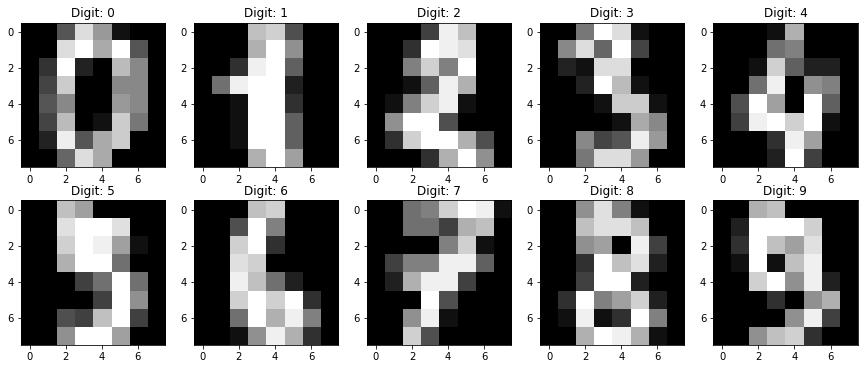

In [8]:
fig = plt.figure(figsize=(15, 6))
columns = 5
rows = 2

# ax enables access to manipulate each of subplots
ax = []

for i in range(0, 10):
    img = mnist.images[i]
    ax.append(fig.add_subplot(rows, columns, i+1))
    ax[-1].set_title("Digit: "+str(i))
    plt.gray() 
    plt.imshow(img) 

# Apply the SVC to perform multi-class classification

In the next section we: 
- Define our dependent and independent variables
- Create train and test sets
- Train our basic SVC model, using basic hyperparameters 
- Evaluate our model against our test set

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, classification_report, precision_recall_curve

In [10]:
X = mnist.data
y = mnist.target

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## SVC Trials

In [12]:
from sklearn.svm import SVC  # "Support vector classifier"
import scikitplot as skplt # for plotting confusion matrix

In [13]:
svc_def = SVC()
svc_def.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [14]:
pred_svc_def = svc_def.predict(X_test)

In [15]:
print("Accuracy Score SVC Default: ", accuracy_score(y_test, pred_svc_def))

Accuracy Score SVC Default:  0.3925925925925926


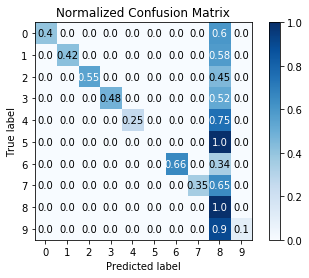

In [16]:
skplt.metrics.plot_confusion_matrix(
    y_test,pred_svc_def, normalize=True,)

The confusion matrix confirms the low score from the Accuracy Score test and points out that the digit 8 is the hardest digit to predict using the SVC default settings. As highlighted by the darker boxes,the SVC classifier will wrongly predict all number values to 8 most of the time, i.e. 5 is confused by 8 100% of the times, while 9 is confused by 8 90% of times. Oddly, 6 a number that visualy resembles 8 more than the rest of the digits is the one that is confused the least by number 8, although 34% is still a high number. Hyperparameter tunning to follow.

## Applying Grid Search is an efficient way to find the best fit hyperparameters for our SVC model. 

In [17]:
from sklearn.model_selection import GridSearchCV, ParameterGrid

The hyperparameters that will be tested are C, Kernel and Gamma. Below we create a gridsearch for all the possible combinations between the given hyperparameters. 

In [18]:
c = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
k = ['linear', 'poly', 'rbf', 'sigmoid']
g = [100, 10,1,0.1,0.01, 0.001]

In [19]:
param_grid = dict(C=c, 
                  kernel=k, 
                  gamma = g )

In [20]:
grid_search = GridSearchCV(SVC(), param_grid=param_grid, scoring="accuracy", n_jobs=-1)

In [21]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'gamma': [100, 10, 1, 0.1, 0.01, 0.001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [22]:
# Top 10 combination of hyperparameters by Average Accuracy Score 
cvres = grid_search.cv_results_
cvres_scores = pd.DataFrame(cvres["mean_test_score"])
cvres_scores.rename(columns={0: 'Average Accuracy Score'}, inplace=True)
cvres_params = pd.DataFrame(cvres["params"])
best_scores_SVC = pd.concat([cvres_scores, cvres_params], axis=1)
best_scores_SVC = best_scores_SVC.sort_values(by=['Average Accuracy Score'], ascending = False)
best_scores_SVC = best_scores_SVC.reset_index().drop(columns=['index'])
best_scores_SVC.head(10)

,Average Accuracy Score,C,gamma,kernel
0,0.989658,100.00000,0.001,rbf
1,0.989658,10.00000,0.001,rbf
2,0.987271,1.00000,0.001,rbf
3,0.985680,0.10000,0.001,poly
4,0.985680,0.00010,0.010,poly
5,0.981702,0.00001,100.000,poly
6,0.981702,0.01000,100.000,poly
7,0.981702,0.00100,0.100,poly
8,0.981702,10.00000,0.100,poly
9,0.981702,0.00010,1.000,poly


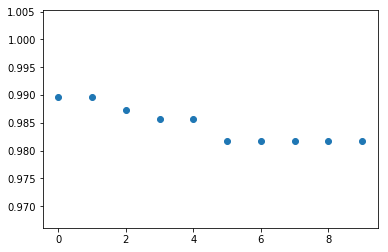

In [23]:
plt.scatter(y = best_scores_SVC["Average Accuracy Score"].head(10), x = best_scores_SVC.head(10).index);

In [24]:
svc_as = best_scores_SVC["Average Accuracy Score"][0]
svc_as

0.9896579156722355

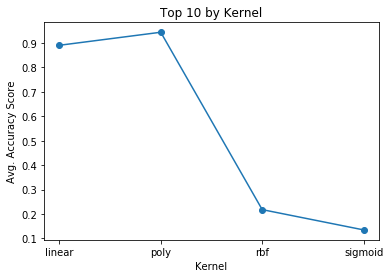

In [25]:
grouped_df_kernel = best_scores_SVC.groupby('kernel')['Average Accuracy Score'].mean()
plt.plot(grouped_df_kernel, marker = 'o')
plt.xlabel('Kernel')
plt.ylabel('Avg. Accuracy Score')
plt.title('Top 10 by Kernel');

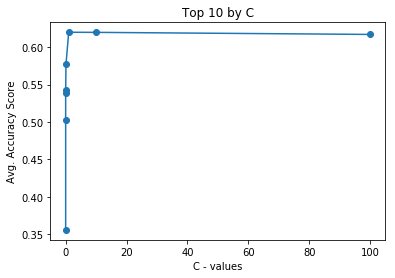

In [26]:
grouped_df_C = best_scores_SVC.groupby('C')['Average Accuracy Score'].mean()
plt.plot(grouped_df_C, marker = 'o')
plt.xlabel('C - values')
plt.ylabel('Avg. Accuracy Score')
plt.title('Top 10 by C');

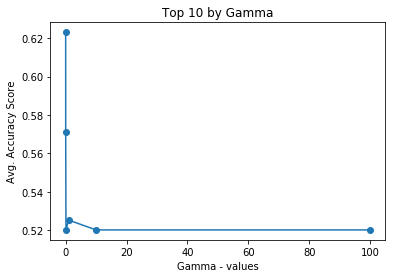

In [27]:
grouped_df_gamma = best_scores_SVC.groupby('gamma')['Average Accuracy Score'].mean()
plt.plot(grouped_df_gamma, marker = 'o')
plt.xlabel('Gamma - values')
plt.ylabel('Avg. Accuracy Score')
plt.title('Top 10 by Gamma');

Best accuracy scores are obtained from kernels using rbf, nonetheless Polynomial kernels are also good predictors. Top 10 models showcase a variety of values in the C and Gamma parameters, indicating these parameters do not play an important role in the model's performance for this particular dataset and prediction challenge. On the other hand, we can observe how the top 3 combinations have a kernell of RBF and 70% of the top 10 have a Polynomial kernell, indicating of the importance of the parameter. 

Nevertheless, let's check the best model from the GridSearch by also running best_params.

In [28]:
print(grid_search.best_score_)
print(grid_search.best_params_)

0.9896579156722355
{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}


In [29]:
svc_best = SVC(C = 10, kernel = 'rbf', gamma= 0.001)

Our gamma is low, and our C is high. This means that the model is working hard to classify each of the examples correctly, and is also considering more examples in defining the hyperplane.

In [30]:
svc_best.fit(X_train,y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [31]:
#cvres = grid_search.cv_results_
#grid_search_results = []
#for accuracy, params in zip(cvres["mean_test_score"], cvres["params"]):
 #       grid_search_results.append(accuracy)
  #      grid_search_results.append(params)

In [32]:
predictions_svc_best = svc_best.predict(X_test)

In [33]:
print("Accuracy Score SVC Best: ", accuracy_score(y_test, predictions_svc_best))

Accuracy Score SVC Best:  0.9907407407407407


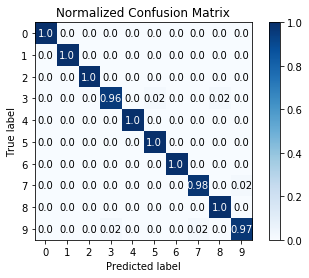

In [34]:
skplt.metrics.plot_confusion_matrix(
    y_test,predictions_svc_best, normalize=True,)

Model has improved dramatically from the default settings by tunning in hyperparamters, the only number that is confused by 8 is number 3, and it only happens 2% of the time.

## More validation for our best model

While not totally necessary in this case because we have already validated above, we will use a stratified Kfold and print the confusion matrix for each fold in order to validate our best_param model. We chose a stratified Kfold because of the nature of this problem - we want to make sure that each validation is given the same ratio of images.

In [35]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
# Using clone to copy our model but without having been fit. 

In [36]:
skfolds = StratifiedKFold(n_splits=3, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train):
    clone_svc = clone(svc_best)
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train[test_index])

    clone_svc.fit(X_train_folds, y_train_folds)
    y_pred = clone_svc.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.9858156028368794
0.9928400954653938
0.9903614457831326


In [37]:
# We later stumbled on this code, which is much simpler, but I like that the above specifies Kfold
from sklearn.model_selection import cross_val_score
cross_val = cross_val_score(svc_best, X_train, y_train, cv=3, scoring="accuracy")
cross_val

array([0.9858156 , 0.9928401 , 0.99036145])

Our best model gets over ~99% accuracy on all folds.

# Revisiting the different kernel types

More out of curiosity, I wanted to see the relative performance of the different kernel types. Below we create individual models with the different kernels, and then plot their predictive performance. 

In [38]:
svc_poly = SVC(kernel = 'poly')
svc_poly.fit(X_train, y_train)
poly_pred = svc_poly.predict(X_test)
conf_poly = confusion_matrix(y_test, poly_pred)

In [39]:
svc_rbf = SVC(kernel = 'rbf')
svc_rbf.fit(X_train, y_train)
rbf_pred = svc_rbf.predict(X_test)
conf_rbf = confusion_matrix(y_test, rbf_pred)

In [40]:
svc_linear = SVC(kernel = 'linear')
svc_linear.fit(X_train, y_train)
linear_rbf = svc_linear.predict(X_test)
conf_linear = confusion_matrix(y_test, linear_rbf)

In [41]:
svc_sigmoid = SVC(kernel = 'sigmoid')
svc_sigmoid.fit(X_train, y_train)
sigmoid_rbf = svc_sigmoid.predict(X_test)
conf_sigmoid = confusion_matrix(y_test, sigmoid_rbf)

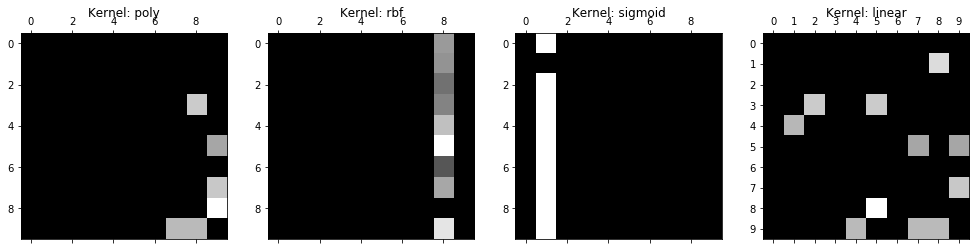

In [42]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(17,4))

#poly
row_sums = conf_poly.sum(axis=1, keepdims=True)
norm_conf_poly = conf_poly / row_sums

np.fill_diagonal(norm_conf_poly, 0)
ax1.matshow(norm_conf_poly, cmap=plt.cm.gray)
ax1.set_title('Kernel: poly')
plt.xticks(np.arange(0, 10, step=1))
plt.yticks(np.arange(0, 10, step=1))

#rbf
row_sums = conf_rbf.sum(axis=1, keepdims=True)
norm_conf_rbf = conf_rbf / row_sums

np.fill_diagonal(norm_conf_rbf, 0)
ax2.matshow(norm_conf_rbf, cmap=plt.cm.gray)
ax2.set_title('Kernel: rbf')
plt.xticks(np.arange(0, 10, step=1))
plt.yticks(np.arange(0, 10, step=1))

#sigmoid
row_sums = conf_sigmoid.sum(axis=1, keepdims=True)
norm_conf_sigmoid = conf_sigmoid / row_sums

np.fill_diagonal(norm_conf_sigmoid, 0)
ax3.matshow(norm_conf_sigmoid, cmap=plt.cm.gray)
ax3.set_title('Kernel: sigmoid')
plt.xticks(np.arange(0, 10, step=1))
plt.yticks(np.arange(0, 10, step=1))

#linear
row_sums = conf_linear.sum(axis=1, keepdims=True)
norm_conf_linear = conf_linear / row_sums

np.fill_diagonal(norm_conf_linear, 0)
ax4.matshow(norm_conf_linear, cmap=plt.cm.gray)
ax4.set_title('Kernel: linear')
plt.xticks(np.arange(0, 10, step=1))
plt.yticks(np.arange(0, 10, step=1))
plt.show()


Rows represent actual classes, while columns are predicted classes. It's curious though how rbf underperforms the poly kernell, when gamma and C are kept default. Nontheless, this enforces the finding from the top 10 table where most of the top performers were Polynomial. 

The rbf struggles with the number 8 - it predicted many of the images to be an 8, when they were in fact another value (particularly 5s). 

The sigmoid kernel, however, stuggled most with the number 1. It is almost as if it predicted everything to be a 1. 

The linear kernel is a bit more scattered. The biggest issues are again with 5s and 8s, but it seems to be the second best kernel option, after poly.

# Repeating the above with C

In [43]:
svc1 = SVC(C = 0.01)
svc1.fit(X_train, y_train)
pred1 = svc_poly.predict(X_test)
conf1 = confusion_matrix(y_test, pred1)

In [44]:
svc2 = SVC(C = 0.1)
svc2.fit(X_train, y_train)
pred2 = svc2.predict(X_test)
conf2 = confusion_matrix(y_test, pred2)

In [45]:
svc3 = SVC(C = 1)
svc3.fit(X_train, y_train)
pred3 = svc3.predict(X_test)
conf3 = confusion_matrix(y_test, pred3)

In [46]:
svc4 = SVC(C = 10)
svc4.fit(X_train, y_train)
pred4 = svc4.predict(X_test)
conf4 = confusion_matrix(y_test, pred4)

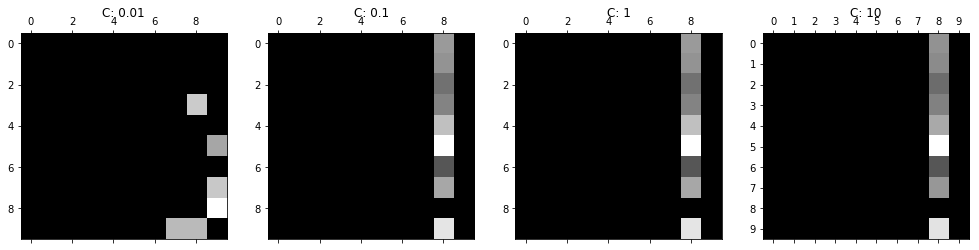

In [47]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(17,4))

#0.0001
row_sums = conf1.sum(axis=1, keepdims=True)
norm_conf_1 = conf1 / row_sums

np.fill_diagonal(norm_conf_1, 0)
ax1.matshow(norm_conf_1, cmap=plt.cm.gray)
ax1.set_title('C: 0.01')
plt.xticks(np.arange(0, 10, step=1))
plt.yticks(np.arange(0, 10, step=1))

#0.001
row_sums = conf2.sum(axis=1, keepdims=True)
norm_conf_2 = conf2 / row_sums

np.fill_diagonal(norm_conf_2, 0)
ax2.matshow(norm_conf_rbf, cmap=plt.cm.gray)
ax2.set_title('C: 0.1')
plt.xticks(np.arange(0, 10, step=1))
plt.yticks(np.arange(0, 10, step=1))

#0.01
row_sums = conf3.sum(axis=1, keepdims=True)
norm_conf_3 = conf3 / row_sums

np.fill_diagonal(norm_conf_3, 0)
ax3.matshow(norm_conf_3, cmap=plt.cm.gray)
ax3.set_title('C: 1')
plt.xticks(np.arange(0, 10, step=1))
plt.yticks(np.arange(0, 10, step=1))

#0.1
row_sums = conf4.sum(axis=1, keepdims=True)
norm_conf_4 = conf4 / row_sums

np.fill_diagonal(norm_conf_4, 0)
ax4.matshow(norm_conf_4, cmap=plt.cm.gray)
ax4.set_title('C: 10')
plt.xticks(np.arange(0, 10, step=1))
plt.yticks(np.arange(0, 10, step=1))

plt.show()


Once again, rows represent actual classes, while columns are predicted classes. For this prediction when other parameters are kept default, a lower C performs better than larger C. Larger C values do a poor job differencing other numbers from 8.


# Visualising some results from our best_params model

In [48]:
#First we apply the best model to the full dataset. 
final_preds = svc_best.predict(X)

In [49]:
print("Accuracy Score SVC Final Prediction: ", accuracy_score(y, final_preds))

Accuracy Score SVC Final Prediction:  0.9972175848636616


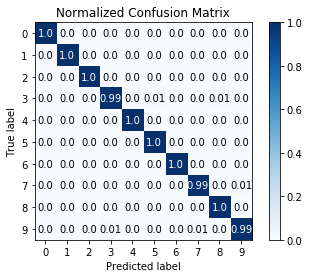

In [50]:
skplt.metrics.plot_confusion_matrix(
    y,final_preds, normalize=True,)

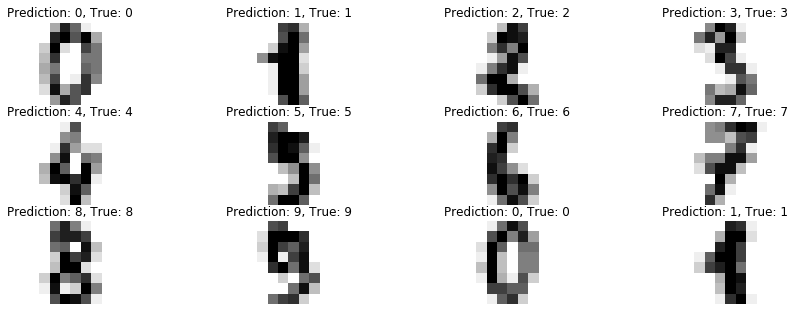

In [51]:
images_and_predictions = list(zip(mnist.images, final_preds, mnist.target))
plt.figure(figsize = (15,7))
for index, (image, prediction, target) in enumerate(images_and_predictions[:12]):
    plt.subplot(4, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: {}, True: {}'.format(prediction, target))

plt.show()

# Playing around with a OvR classification

The SVM model defaults to OvO, let's try OvR.

In [52]:
from sklearn.multiclass import OneVsRestClassifier
ovr_svc = OneVsRestClassifier(SVC(random_state=42))
ovr_svc.fit(X_train, y_train)
ovr_preds = ovr_svc.predict(X_test)

In [53]:
svc_ovr_as = accuracy_score(y_test, ovr_preds)

In [54]:
print("Accuracy Score OvR: ", svc_ovr_as)

Accuracy Score OvR:  0.7888888888888889


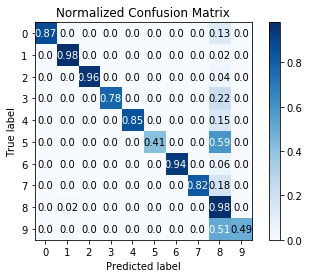

In [55]:
ovr_conf_mx = skplt.metrics.plot_confusion_matrix(
    y_test,ovr_preds, normalize=True,)
ovr_conf_mx

In [56]:
print(classification_report(y_test,ovr_preds))

              precision    recall  f1-score   support

           0       1.00      0.87      0.93        53
           1       0.98      0.98      0.98        50
           2       1.00      0.96      0.98        47
           3       1.00      0.78      0.88        54
           4       1.00      0.85      0.92        60
           5       1.00      0.41      0.58        66
           6       1.00      0.94      0.97        53
           7       1.00      0.82      0.90        55
           8       0.27      0.98      0.42        43
           9       1.00      0.49      0.66        59

   micro avg       0.79      0.79      0.79       540
   macro avg       0.93      0.81      0.82       540
weighted avg       0.94      0.79      0.82       540



Interesting to see how much lower the accuracy is here. The OVR model particularly struggles with 8. 8 has very high recall, but low precision.

This makes perfect sense for our specific challenge: in a ovo approach the model is trained on how to distinguish 8 from a 4, 8 from a 3, 8 from a 0 .... etc. However, in the above ovr approach, all of these images are grouped together so the model is less equipped at identifying which specific digits look more similar to an 8. 

# K Nearest Neighbours classification

SVC is clearly an effective technique for classifying the MNIST digits, but we also chose to explore some of the other classification algorithms that we know. First, KNN. We will immediately use a GridSearch approach in order to tune the best model. 

In [57]:
from sklearn.neighbors import KNeighborsClassifier

In [58]:
n = [1, 2, 3, 4, 5, 10]
w = ['uniform', 'distance']
a = ['ball_tree', 'kd_tree', 'brute', 'auto']

In [59]:
param_grid = dict(n_neighbors=n, 
                  weights=w, 
                  algorithm=a )

In [60]:
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, scoring="accuracy")

In [61]:
knn = grid_search.fit(X_train, y_train)

In [62]:
knn_as = knn.best_score_

In [63]:
print(knn.best_score_)
print(knn.best_params_)

0.984884645982498
{'algorithm': 'ball_tree', 'n_neighbors': 1, 'weights': 'uniform'}


In [64]:
knn_preds = knn.predict(X_test)

In [65]:
knn_conf_mx = confusion_matrix(y_test, knn_preds)
knn_conf_mx

array([[53,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 50,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 47,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 53,  0,  0,  0,  0,  1,  0],
       [ 0,  1,  0,  0, 59,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 65,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 53,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 54,  0,  1],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 41,  1],
       [ 0,  0,  0,  2,  1,  0,  0,  0,  0, 56]])

In [66]:
knn_best = KNeighborsClassifier(algorithm='ball_tree', n_neighbors=1, weights='uniform')

In [67]:
knn_best.fit(X_test, y_test)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [68]:
knn_best_preds = knn_best.predict(X_test)

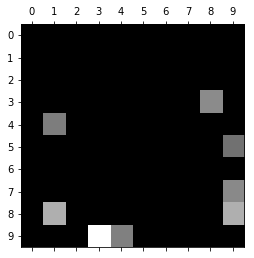

In [69]:
# The first rows normalize for the fact that there may be different counts in each category that we're predicting.
row_sums = knn_conf_mx.sum(axis=1, keepdims=True)
norm_knn_conf_mx = knn_conf_mx / row_sums

# We fill the diagonals with zero, since we're more interested in what the model got wrong. 
np.fill_diagonal(norm_knn_conf_mx, 0)
plt.matshow(norm_knn_conf_mx, cmap=plt.cm.gray)
plt.xticks(np.arange(0, 10, step=1))
plt.yticks(np.arange(0, 10, step=1))
plt.show()

# Random Forest

Next, we apply Random Forest. We will just try a basic model to see how it compares to our basic SVC.

In [70]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

In [72]:
rfc.fit(X_train,y_train)
rfc_preds = rfc.predict(X_test)

In [73]:
rfc_conf_mx = confusion_matrix(y_test, rfc_preds)
rfc_conf_mx

array([[52,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 50,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 47,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 52,  0,  0,  0,  0,  2,  0],
       [ 0,  0,  0,  0, 60,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1, 63,  1,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  1, 52,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 54,  0,  1],
       [ 0,  2,  0,  0,  0,  0,  0,  0, 41,  0],
       [ 0,  0,  0,  1,  0,  1,  0,  1,  0, 56]])

In [74]:
rf_as = accuracy_score(y_test, rfc_preds)
rf_as

0.975925925925926

While the RF is not as accurate as the best SVC model, it is much more accurate than the default SVC model. We are sure that we could further improve this model, but that's for the next assignment ;)

# Conclusion:

In [75]:
as_list = ["SVC OVO", "Random Forest", "KNN", "SVC OVR"]

In [76]:
final_as = pd.DataFrame([svc_as, rf_as, knn_as, svc_ovr_as], as_list, columns = ["Score"])
final_as

,Score
SVC OVO,0.989658
Random Forest,0.975926
KNN,0.984885
SVC OVR,0.788889


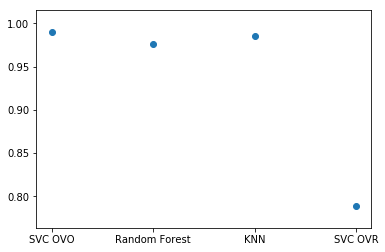

In [79]:
plt.scatter(y = final_as.Score, x = final_as.index)
plt.xticks(np.arange(4));

### To conclude, the SVC with the highest accuracy score is the one with the rbf kernel, a C value of 10.00	and a gamma of 0.001. 
### On average, the highest result was achieved when choosing the poly kernel. The rbf is on average one of the worser kernels. But through a grid search the best parameters were found. With the right combination the rbf kernel outperforms the others.
### Choosing the One vs Rest approach over the One vs One approach does not increase in the accuracy.
### Trying other models, it can be concluded that the SVC is the best approach. But the K-Nearest-Neighbor model yields a similarly high score. The Random Forest approach is the worst out of the three.
### The highest accuracy score achieved is ~0.989658 with the above parameters.
### Thanks for reading.